# Heart Failure Prediction

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

### Description: 
#### Part 1 - Background info

###### 1. What’s the difference between decision trees and logistic regression?
The main difference between decision trees and logistic regression is that logistic regression is a linear algorithm that models the probability of the output variable based on a set of input variables, while decision tree is a non-linear algorithm that creates a tree-like model to classify the data based on the most important features.
###### 2. What’s the difference between predictors and response variables?
Predictors are variables used to predict the response variable, while the response variable is the variable that is being predicted. In other words, predictors are the independent variables, and the response variable is the dependent variable. For example, if we are trying to predict a whether a person died from heart failure, age, anaemia, diabetes, time, and sex would be some of the predictors, while death will be the response variable.
###### 3. What is the purpose and benefits of preprocessing data?
Preprocessing data involves transforming raw data into a format that is suitable for analysis. The purpose of preprocessing data is to improve the quality of data by removing errors, inconsistencies, and outliers, as well as to transform the data into a format that can be easily analyzed using machine learning algorithms. Some benefits of preprocessing data include improved accuracy of predictions, improved computational efficiency, and better understanding of the data.
###### 4. What is overfitting and underfitting that data? What are the consequences.
Overfitting and underfitting are common problems that occur when building machine learning models. Overfitting occurs when a model is too complex and captures noise or random fluctuations in the training data, resulting in poor performance on new data. Underfitting occurs when a model is too simple and fails to capture the underlying patterns in the data, resulting in poor performance on both the training and new data. The consequences of overfitting and underfitting include poor predictive accuracy, reduced generalization ability, and reduced interpretability of the model.

###  Description: 
#### Part 2 - About the Data Questions

###### The features in the dataset are:
- age: the age of the patient in years.
- anaemia: a boolean feature that indicates if the patient has a decrease in red blood cells or hemoglobin.
- high blood pressure: a boolean feature that indicates if the patient has hypertension.
- creatinine phosphokinase (CPK): the level of the CPK enzyme in the blood in mcg/L.
- diabetes: a boolean feature that indicates if the patient has diabetes.
- ejection fraction: the percentage of blood leaving the heart at each contraction.
- platelets: the number of platelets in the blood in kiloplatelets/mL.
- sex: a binary feature that indicates if the patient is a woman or a man.
- serum creatinine: the level of serum creatinine in the blood in mg/dL.
- serum sodium: the level of serum sodium in the blood in mEq/L.
- smoking: a boolean feature that indicates if the patient smokes or not.
- time: the follow-up period in days.
- [target] death event: a boolean feature that indicates if the patient deceased during the follow-up period.

###### The response variable in the dataset is:
The 'death event' feature, which indicates if the patient died during the follow-up period.

###### The categorical features in the dataset are:
- anaemia
- high blood pressure
- diabetes
- sex
- smoking
- death event

###### The continuous features in the dataset are:
- age
- creatinine phosphokinase (CPK)
- ejection fraction
- platelets
- serum creatinine
- serum sodium
- time

Categorical features are those that can be grouped into a set of categories, while continuous features are those that can take on any value within a range. In this case, the categorical features are all boolean features, while the continuous features are all numerical features.

###  Description:
#### Problem Statement Paragraph

Heart failure is a serious medical condition that affects millions of people worldwide, and early detection of patients at risk of dying from heart failure can help healthcare providers intervene before the situation becomes critical. The creation of a model to predict mortality caused by heart failure can help healthcare providers to identify high-risk patients and develop personalized interventions to improve patient outcomes. The use of machine learning algorithms, such as decision tree, neural network, and logistic regression in this case, can improve the accuracy and reliability of such models and facilitate the development of more effective interventions. Overall, the benefits of creating a model to predict mortality caused by heart failure are potentially significant, both for individual patients and for the healthcare system as a whole.

### Description: 
#### Part 3: Data Exploration

In [2]:
heart_df = pd.read_csv('COSC3337_Project1_heart_failure_clinical_records_dataset.csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


###  Description: 
#### Check for missing values.

In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


###  Description: 
#### Determine the number of unique values for each column.

In [4]:
heart_df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

###  Description: 
#### Answers to the questions.

###### 1. Are there any missing values?
There are no missing values in the dataset as each column has 299 non-null entries.
###### 2. Any null values?
There are no null values in the dataset.
###### 3. How many unique values are there for each column?
- age:                         47
- anaemia:                      2
- creatinine_phosphokinase:   208
- diabetes:                     2
- ejection_fraction:           17
- high_blood_pressure:          2
- platelets:                  176
- serum_creatinine:            40
- serum_sodium:                27
- sex:                          2
- smoking:                      2
- time:                       148
- DEATH_EVENT:                  2

### Description: 
#### Boxplot for ejection_fraction.

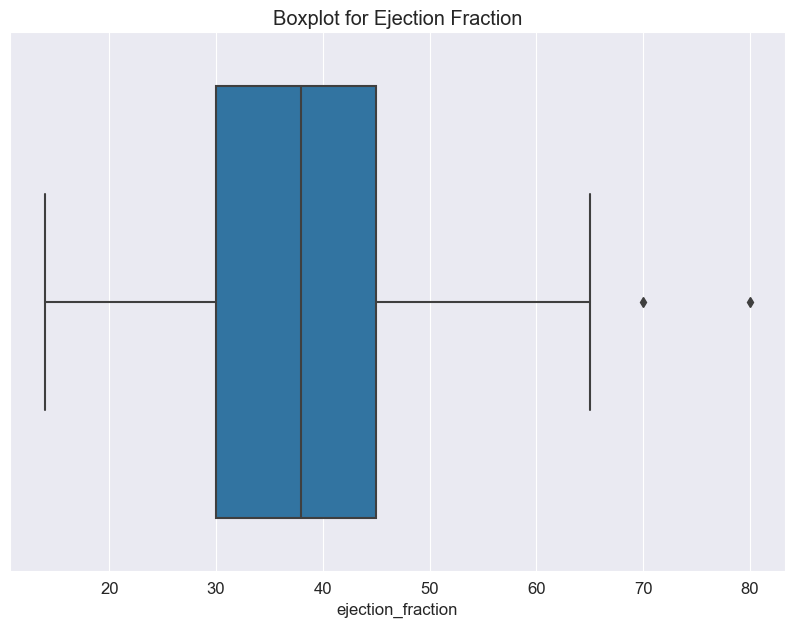

In [5]:
sns.boxplot(x=heart_df['ejection_fraction'])
plt.title('Boxplot for Ejection Fraction')
plt.show()

### Result interpretation:
###### What does this plot tell you?
The box in the plot represents the interquartile range (IQR) from 30 to around 45, which is the middle 50% of ejection fraction. The median ejection fraction of around 38 is represented by the straight line in the box. The minimum ejection fraction was around 13, while the maximum ejection fraction was around 65. We can also see that the boxplot shows a fairly symmetric distribution of ejection_fraction.
###### Any outliers?
There are 2 outliers in the plot whoose ejection fraction values are represented as 70 and 80 respectively.
###### Do they need to be removed, if so, why? (or why not?).
These outliers are not extreme, and they are not far from the rest of the data, so they do not need to be removed.

### Description: 
#### Boxplot for time.

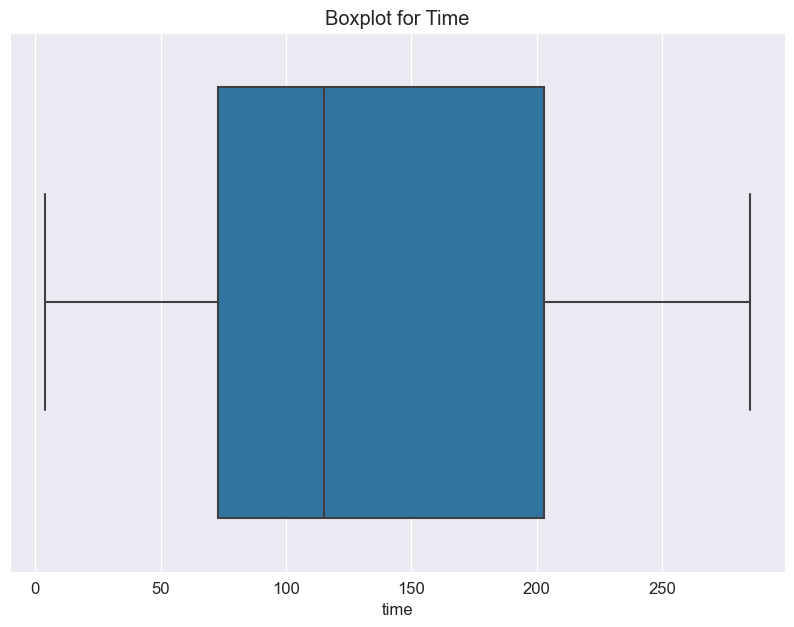

In [6]:
sns.boxplot(x=heart_df['time'])
plt.title('Boxplot for Time')
plt.show()

### Result interpretation:
###### What does this plot tell you?
The box in the plot represents the interquartile range (IQR) from around 70 to around 205, which is the middle 50% of times reported. The median time of around 130 is represented by the straight line in the box. The minimum time was around 5, while the maximum time was around 280. We can also see that the boxplot shows a fairly symmetric distribution of time.
###### Any outliers?
There are no outliers in the plot.
###### Do they need to be removed, if so, why? (or why not?).
There are no outliers in the plot, so there is no need to remove any data.

### Description: 
#### Boxplot for Serum Creatinine.

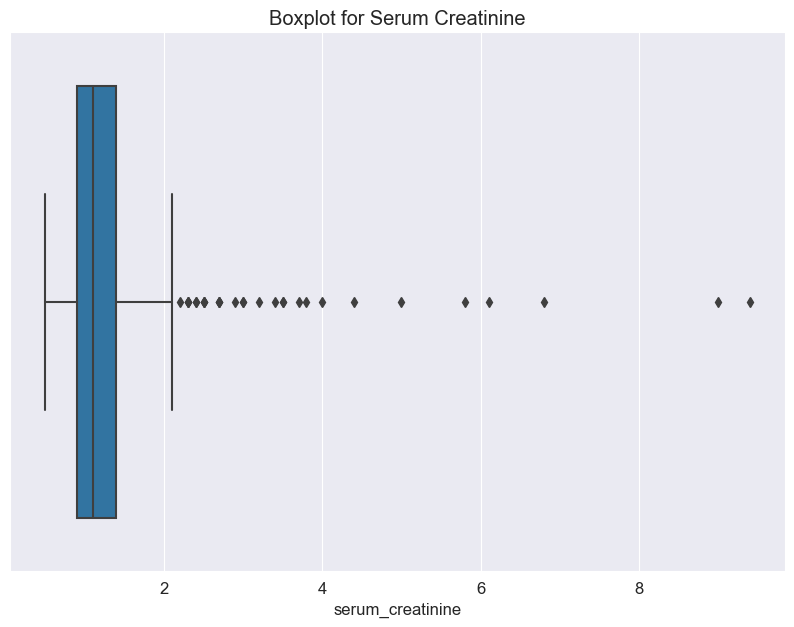

In [7]:
sns.boxplot(x=heart_df['serum_creatinine'])
plt.title('Boxplot for Serum Creatinine')
plt.show()

### Result interpretation:
###### What does this plot tell you?
The box in the plot represents the interquartile range (IQR) from around 0.9 to around 1.3, which is the middle 50% of Serum Creatinine. The median Serum Creatinine of around 1.1 is represented by the straight line in the box. The minimum Serum Creatinine was around 0.4, while the maximum Serum Creatinine was around 2.1. We can also see that the boxplot shows a distribution of Serum Creatinine skewed to the right.
###### Any outliers?
There are many outliers in the plot whoose Serum Creatinine values range from around 2.2 to around 9.5
###### Do they need to be removed, if so, why? (or why not?).
Since there are many outliers, and some of them have extreme values that skew the plot, it is necessary to remove them.

### Description: 
#### Pie chart for the remaining categorical variables.

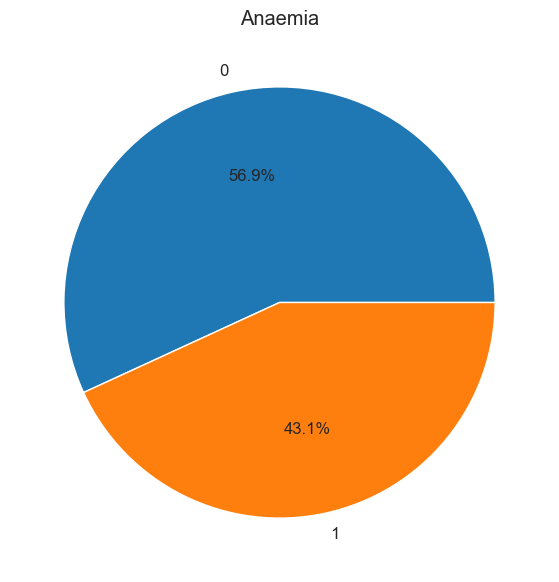

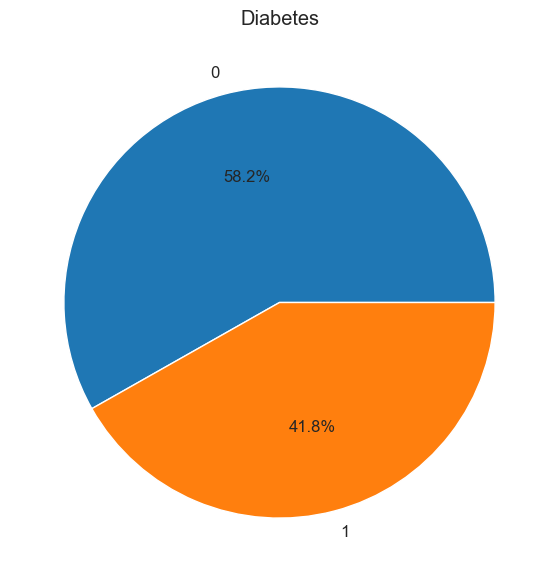

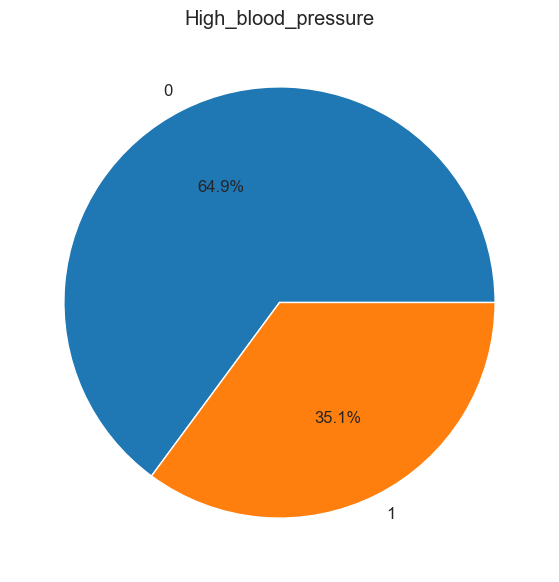

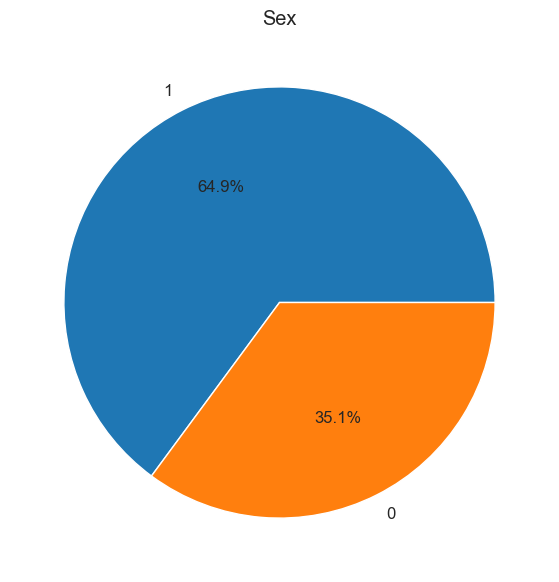

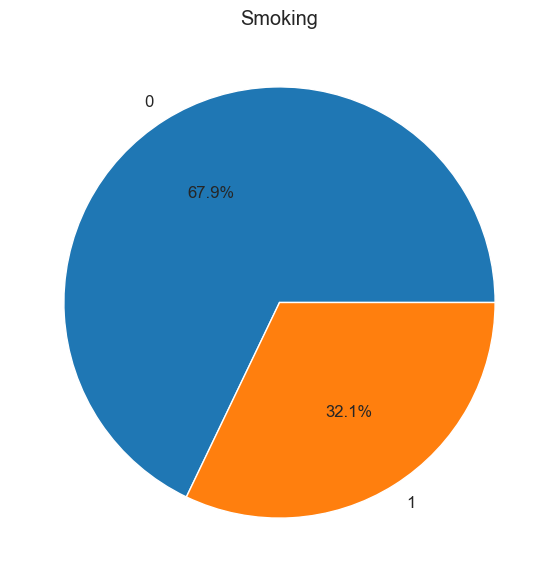

In [8]:
# Select the categorical variables
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Create a pie chart for each categorical variable
for col in categorical_cols:
    # Count the number of occurrences for each value
    counts = heart_df[col].value_counts()
    
    # Create a pie chart
    fig, ax = plt.subplots()
    ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    ax.set_title(col.capitalize())

plt.show()

### Result interpretation:
###### Report your conclusions from each plot.
From the pie charts, we can conclude that the dataset is imbalanced for nearly all of the categorical variables such as smoking, high blood pressure, diabetes, anaemia, and sex. For example, the majority of patients in the dataset are male, non-smokers, do not have high blood pressure or diabetes, and do not have anaemia.
###### Is working with a balanced dataset important? Why or why not? 
Working with a balanced dataset is important because it ensures that the model is not biased towards one class and can generalize well to new data. However, in some cases, it may not be possible to obtain a balanced dataset due to the rarity of certain events or conditions, which can lead to imbalanced datasets. 
###### How can we deal with an imbalanced dataset?
In such cases, we can deal with an imbalanced dataset by using techniques such as undersampling, oversampling, or a combination of both. Undersampling involves randomly removing examples from the majority class, while oversampling involves creating synthetic examples for the minority class. We can also use cost-sensitive learning algorithms that assign different costs to misclassifying different classes to address the class imbalance problem.

### Description: 
#### Pie chart that shows the percentage of survivors from males and females separately.

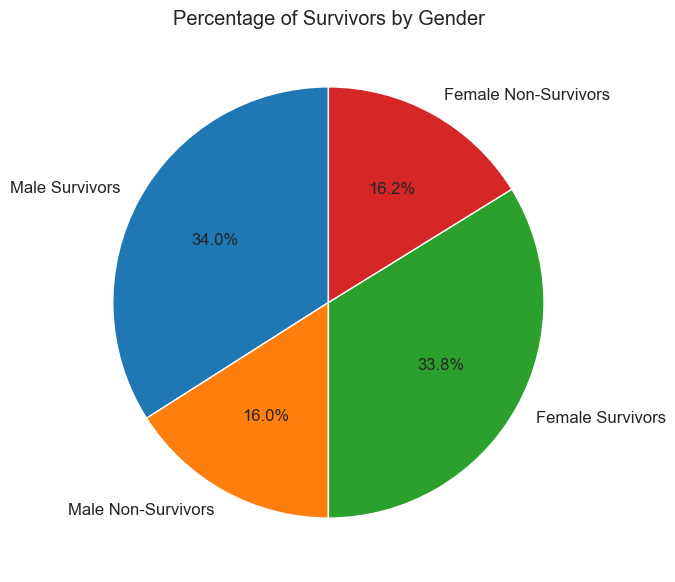

In [9]:
# Group the data by gender and death event
gender_survivors = heart_df.groupby(['sex', 'DEATH_EVENT'])['DEATH_EVENT'].count()

# Calculate the total number of survivors for each gender
male_total = gender_survivors[1][0] + gender_survivors[1][1]
female_total = gender_survivors[0][0] + gender_survivors[0][1]

# Calculate the percentage of survivors for each gender
male_survivors = gender_survivors[1][0] / male_total * 100
female_survivors = gender_survivors[0][0] / female_total * 100

# Create a pie chart to show the percentage of survivors for each gender
labels = ['Male Survivors', 'Male Non-Survivors', 'Female Survivors', 'Female Non-Survivors']
sizes = [male_survivors, 100-male_survivors, female_survivors, 100-female_survivors]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Percentage of Survivors by Gender')

# Show the plot
plt.show()

### Result interpretation:
###### Report your conclusions from the plot.
The plot shows that the percentage of female survivors is slightly higher than the percentage of male survivors. However, the difference is not very significant. Overall, the majority of patients in the dataset survived.

### Description: 
#### Distribution plots of the numerical variables.

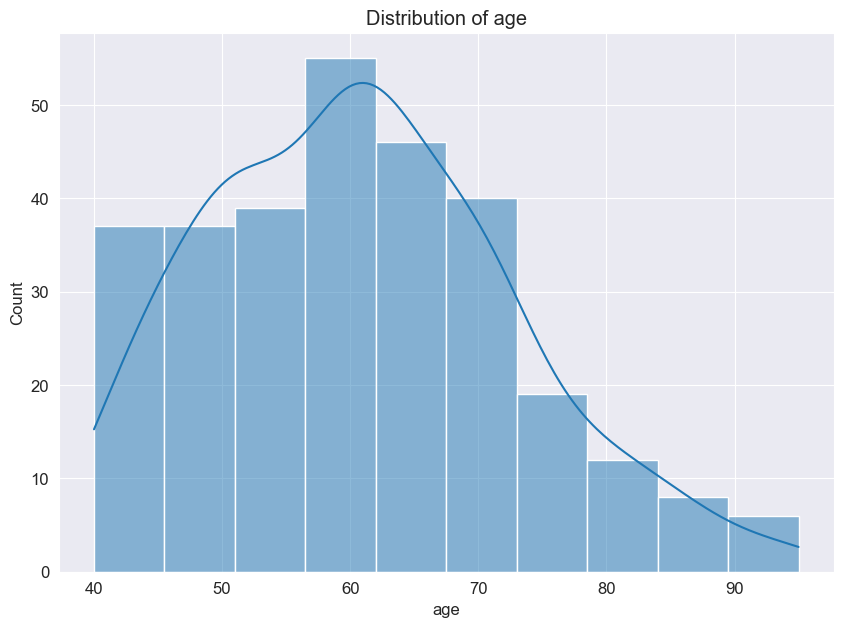

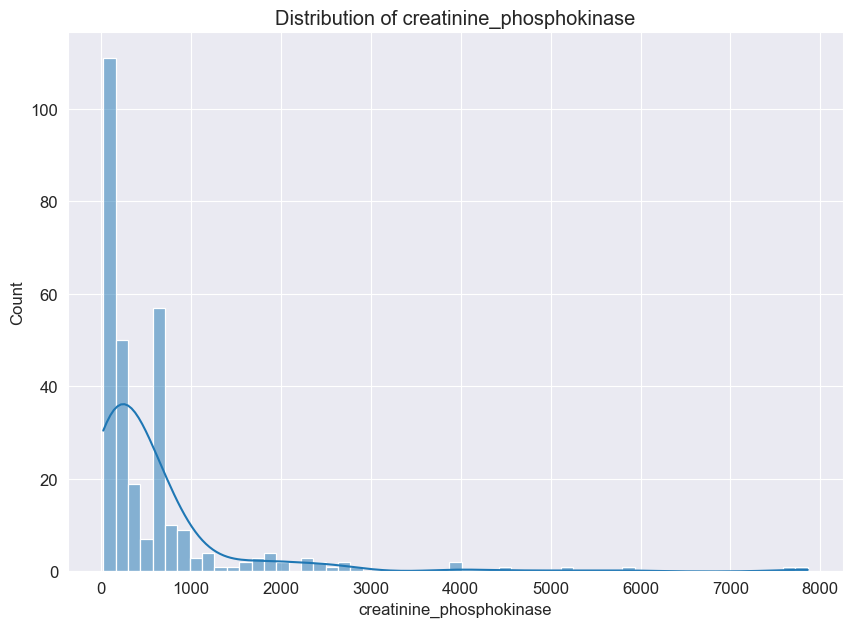

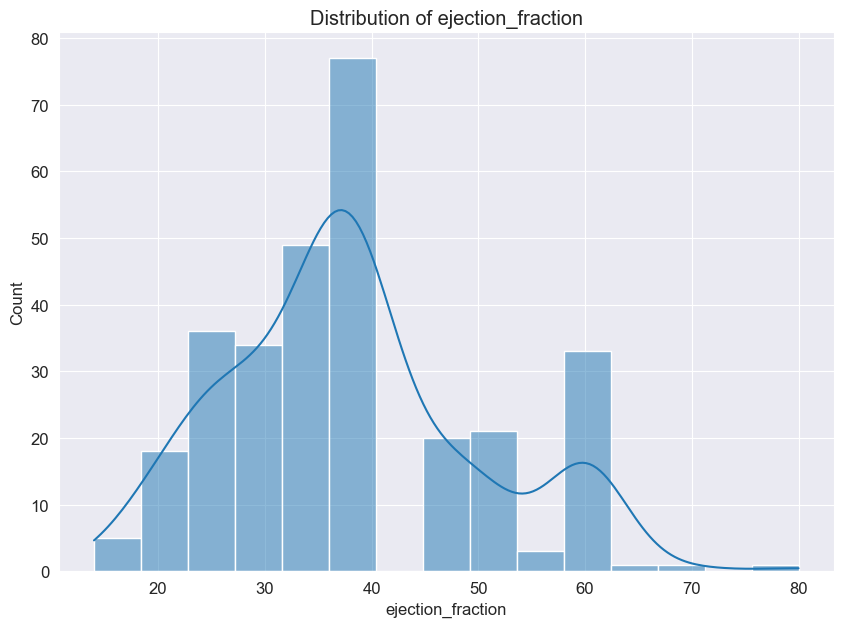

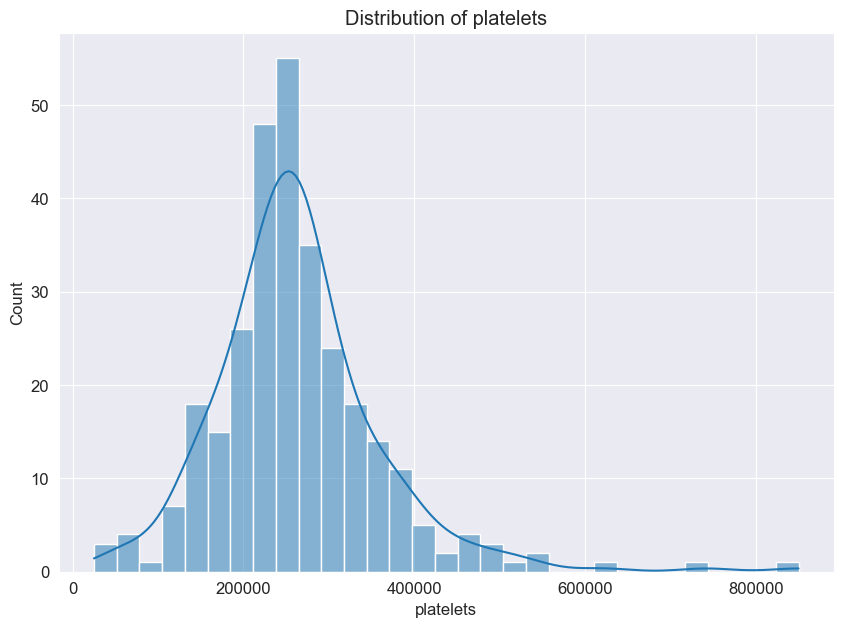

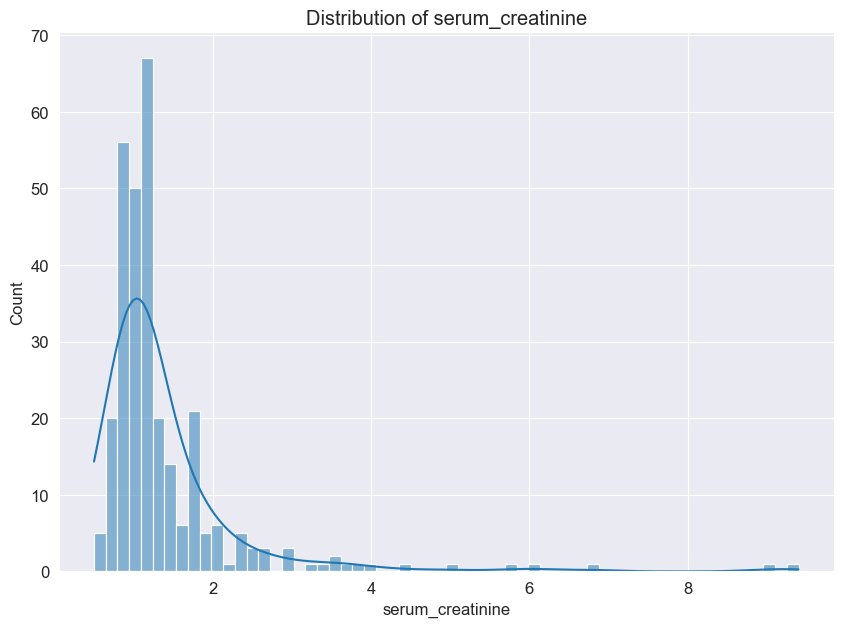

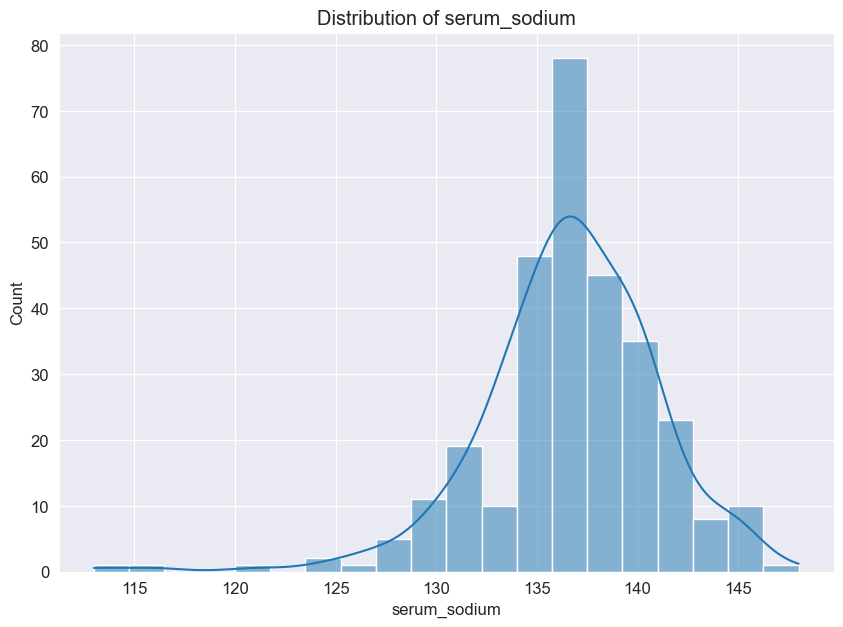

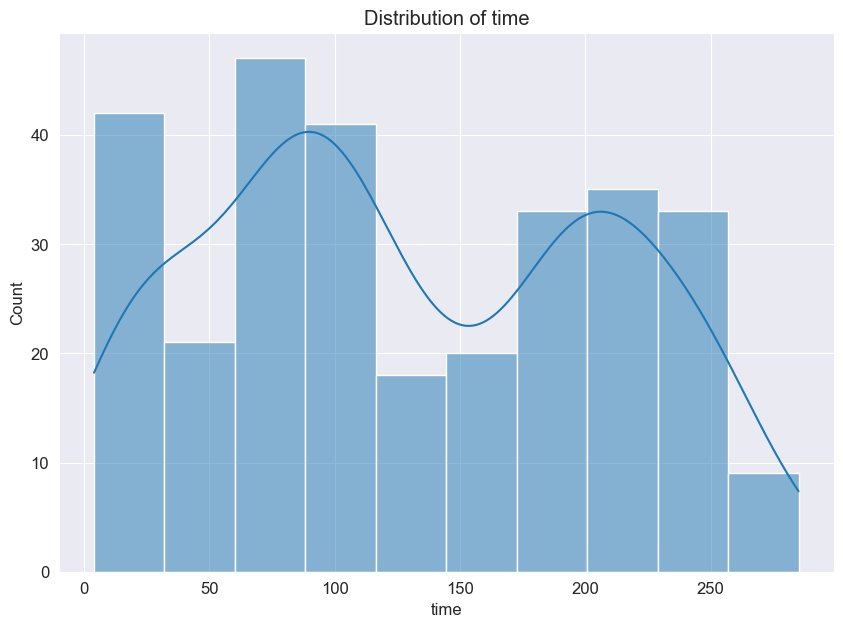

In [10]:
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for col in numerical_columns:
    sns.histplot(data=heart_df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Result interpretation:
###### Report your conclusions from each plot.
- Age: The distribution is somewhat right-skewed, with a peak around 60 years old. There are also a few patients above 90 years old.
- Creatinine phosphokinase: The distribution is highly right-skewed, with a few extreme values above 7,000.
- Ejection fraction: The distribution is somewhat left-skewed, with a peak around 35-40%. There are also a few patients with ejection fraction close to 0%.
- Platelets: The distribution is somewhat normal, with a peak around 250000.
- Serum creatinine: The distribution is highly right-skewed, with a few extreme values above 9.
- Serum sodium: The distribution is somewhat normal, with a peak around 135-140.
- Time: The distribution is somewhat uniform, with patients spread out over the follow-up period.

### Description: 
#### Heatmap of the data.

<AxesSubplot:>

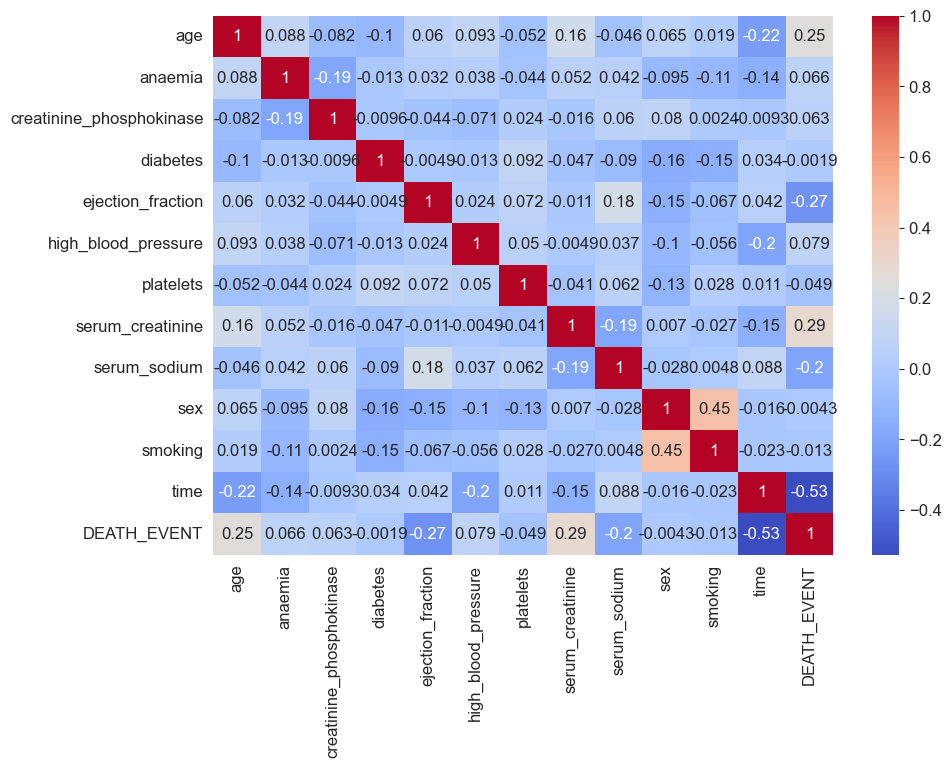

In [11]:
sns.heatmap(heart_df.corr(), cmap='coolwarm', annot=True)

### Result interpretation:
###### What does it tell you?
This heatmap shows the correlation between each pair of features in the dataset, with the degree of correlation indicated by the color and the size of the square.
###### Define multicollinearity.
Multicollinearity is a situation where two or more independent variables in a regression model are highly correlated with each other.
###### Is there multicollinearity in our dataset?
Looking at the heatmap, we can see that there is some multicollinearity in our dataset. For example, time is strongly negatively correlated with death event. Ejection fraction is negatively correlated with death event, while serum creatinine is positively correlated with death event. Additionally, there is a positive correlation between age and death event.
###### Why do we care?
Multicollinearity can cause problems in regression models, such as making it difficult to determine the effect of individual features on the target variable.
###### How did you check?
In our dataset, we can check for multicollinearity by looking at the correlation matrix of the features, which we can visualize using the heatmap. If two or more features have a high correlation coefficient (close to 1), then they are likely to be highly correlated.

### Description: 
#### Scatterplot of Age vs. Ejection Fraction (choice 1).

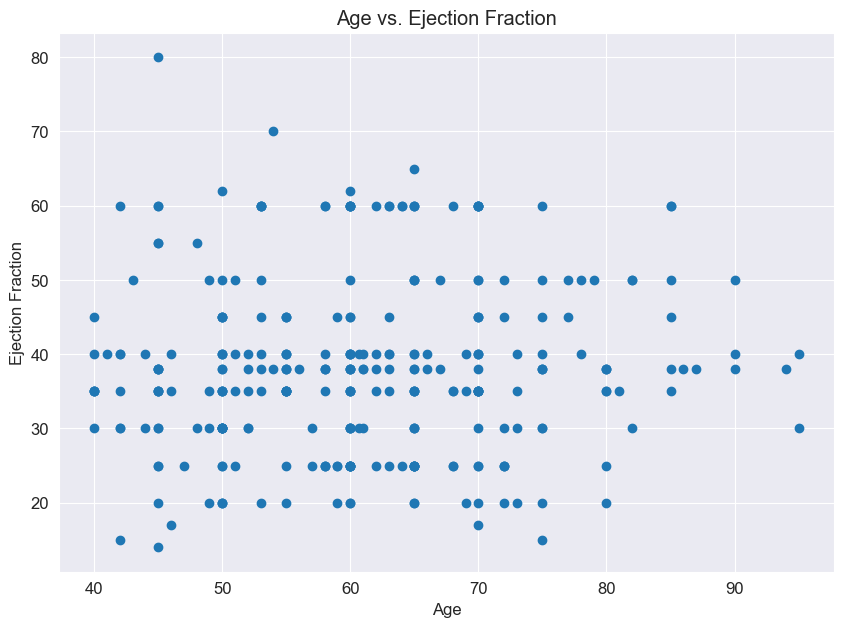

In [12]:
plt.scatter(heart_df['age'], heart_df['ejection_fraction'])
plt.xlabel('Age')
plt.ylabel('Ejection Fraction')
plt.title('Age vs. Ejection Fraction')
plt.show()

### Result interpretation:
This scatterplot shows the relationship between a patient's age and their ejection fraction, which is a measure of how much blood the heart pumps out with each contraction. We can see that there is a slight negative correlation between age and ejection fraction, meaning that as a patient gets older, their ejection fraction tends to decrease slightly. However, there is quite a bit of variability in ejection fraction at every age, so age is not a strong predictor of ejection fraction.

### Description: 
#### Histogram of Platelets (choice 2).

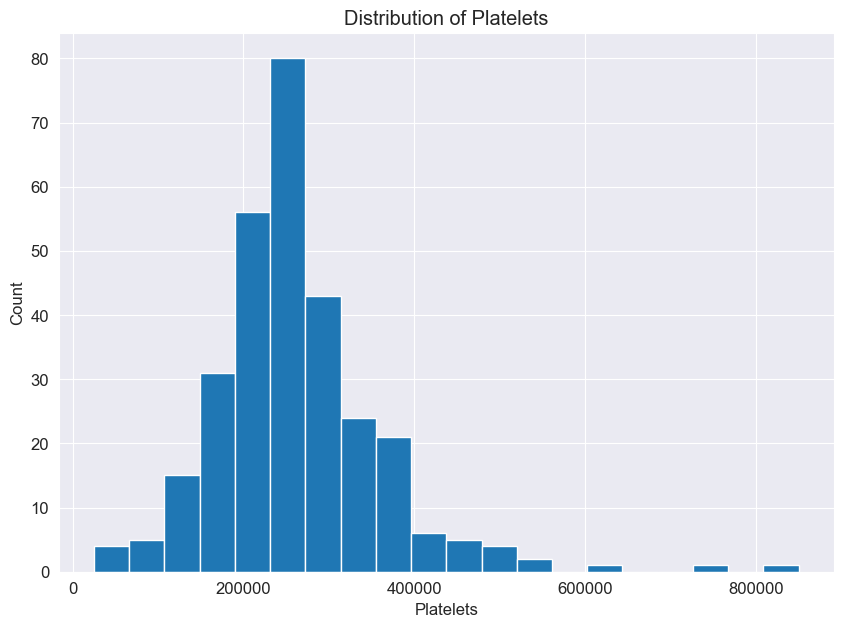

In [13]:
plt.hist(heart_df['platelets'], bins=20)
plt.xlabel('Platelets')
plt.ylabel('Count')
plt.title('Distribution of Platelets')
plt.show()

### Result interpretation:
This histogram shows the distribution of platelet counts in the dataset. We can see that the data is heavily skewed to the right, with a long tail of high platelet counts. This suggests that there may be some outliers in the data that are skewing the distribution. Additionally, there are a few platelet counts that are significantly higher than the rest of the data, which could potentially be outliers that need to be investigated further.

### Description: 
#### Scaling the data.

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart_df.drop('DEATH_EVENT', axis=1), heart_df['DEATH_EVENT'], test_size= 0.3, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the testing data
X_test_scaled = scaler.transform(X_test)

### Result interpretation:
###### 1. Is it necessary to scale the data? What benefits would it provide?
It is usually necessary to scale the data, especially when we have features that are measured in different units or with different scales. Scaling the data helps to normalize the features, so that they are on the same scale, and to ensure that each feature has equal importance in the model. Scaling can also help to improve the performance of some machine learning algorithms, such as those based on distance metrics, gradient descent, or regularization.
###### 2. Which scaler will you use for this data set? Min Max, Standard, Robust, etc.
For this dataset, we can use either the MinMaxScaler or the StandardScaler, since the features are mostly continuous and normally distributed. I decided to use MinMaxScaler.
###### 3. Are the features or the response variables scaled? 
In general, we should scale the features, not the response variable, since the response variable is what we want to predict and it should remain on the same scale as the original data.

### Description: 
#### Preprocessing the data.

In [15]:
# create dummy variables
dummy_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for col in dummy_columns:
    dummies = pd.get_dummies(heart_df[col], prefix=col, drop_first=True)
    heart_df = pd.concat([heart_df, dummies], axis=1)
    heart_df.drop(col, axis=1, inplace=True)

### Result interpretation:
###### 1. Which columns needed to be modified (dummy variables)?
The columns that needed to be modified to dummy variables are: anaemia, diabetes, high_blood_pressure, sex, and smoking.
###### 2. What are parametric and nonparametric learning algos? For the models you are choosing- are they parametric or nonparametric? Explain.
Parametric learning algorithms make assumptions about the underlying distribution of the data. They have a fixed, finite set of parameters that need to be estimated from the training data. Linear regression and logistic regression are examples of parametric learning algorithms. In linear regression, we assume that the relationship between the input variables and the output variable is linear, and we estimate the coefficients of the linear equation. In logistic regression, we assume that the output variable is binary and we estimate the parameters of a logistic function. Nonparametric learning algorithms, on the other hand, do not make any assumptions about the underlying distribution of the data. They are more flexible and can fit more complex patterns in the data. Decision trees are an example of nonparametric learning algorithms. In decision tree learning, we build a tree structure that recursively partitions the data into subsets based on the input variables. We do not assume any specific relationship between the input and output variables. In summary, logistic regression is a parametric learning algorithm, while decision trees are nonparametric learning algorithms.
###### 3. Define label encoding and one hot encoding and compare them.
Label encoding is a process of converting categorical variables into numerical form where each unique category is assigned a unique integer value. One hot encoding is a process of converting categorical variables into a binary form where each unique category is represented as a binary vector. In one hot encoding, a binary vector of length n is created for a categorical variable with n unique categories, where only one element in the vector is 1 and the rest are 0s, indicating the category of the variable. The main difference between the two is that label encoding does not create additional columns in the dataset, while one hot encoding creates additional columns for each unique category in the dataset. One hot encoding is generally preferred over label encoding when the categorical variable does not have an inherent order or hierarchy among its categories, as using label encoding may introduce spurious relationships between categories based on their assigned integer values.

### Description: 
#### Part 4 Model - Decision Tree

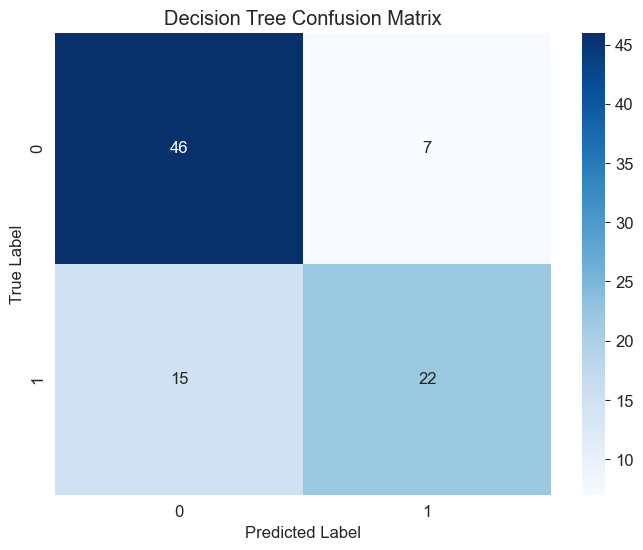


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        53
           1       0.76      0.59      0.67        37

    accuracy                           0.76        90
   macro avg       0.76      0.73      0.74        90
weighted avg       0.76      0.76      0.75        90

Accuracy Score: 0.7555555555555555


In [27]:
# Decision Tree
modelDT = DecisionTreeClassifier(max_depth = 12, criterion='entropy')

modelDT.fit(X_train_scaled, y_train)

y_pred_DT = modelDT.predict(X_test_scaled)

# Decision Tree Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_DT))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_DT)}")

### Result interpretation:
The decision tree's accuracy of 76% could be improved. The decision tree also doesn't seem to be overfitting to the training data. However, the decision tree performed better than the logistic regression model, with less false predictions. 

### Description: 
#### Neural Network

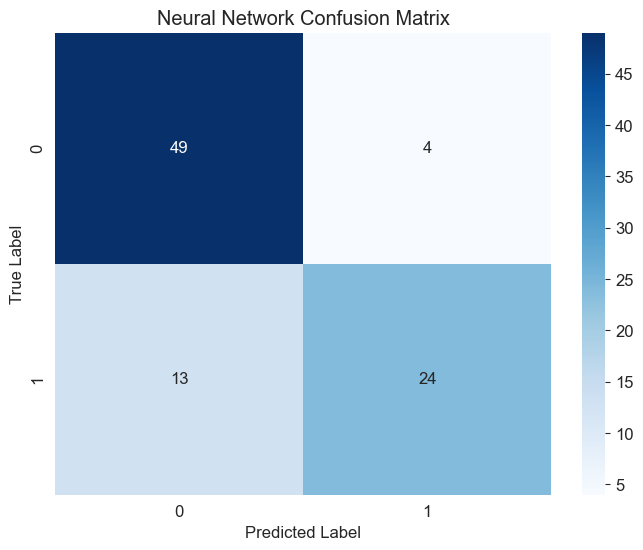


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        53
           1       0.86      0.65      0.74        37

    accuracy                           0.81        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.82      0.81      0.81        90

Accuracy Score: 0.8111111111111111


In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500, activation='relu')
mlp.fit(X_train_scaled, y_train)
predictions = mlp.predict(X_test_scaled)

# Neural Network Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nNeural Network Classification Report:")
print(classification_report(y_test, predictions))
print(f"Accuracy Score: {accuracy_score(y_test, predictions)}")

### Result interpretation:
The neural network had a better accuracy than the decision tree and had both less false predictions and more true predictions. The model doesn't appear to be overfitting, and it is more accurate, making it a better model to use for predicting death from heart failure.

### Description: 
#### Logistic Regression

Logistic Regression Accuracy Score: 0.7444444444444445


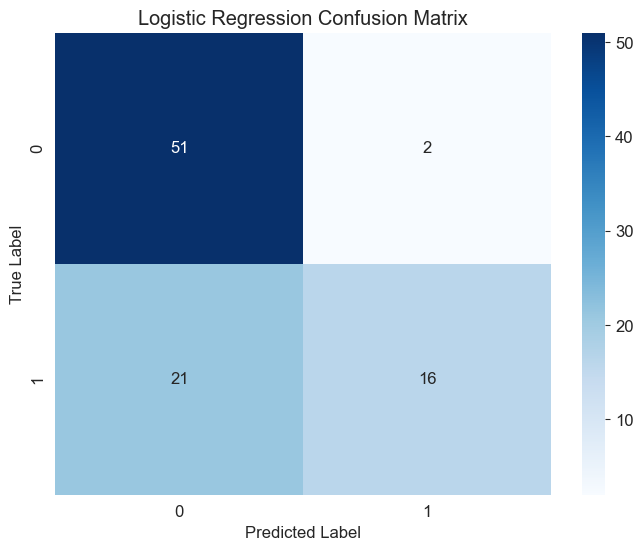


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        53
           1       0.89      0.43      0.58        37

    accuracy                           0.74        90
   macro avg       0.80      0.70      0.70        90
weighted avg       0.78      0.74      0.72        90

Accuracy: 0.72 (+/- 0.00)


In [18]:
# Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Evaluate the logistic regression model
y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print('Logistic Regression Accuracy Score:', accuracy_logreg)

# Logistic Regression Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Compute cross-validation scores
scores = cross_val_score(logreg, X_test_scaled, y_test, cv=5)

# Print mean and standard deviation of scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### Result interpretation:
This model was less accurate than the decision tree model and the neural network, and was an ok fit for the data. Since we want to minimize incorrect predictions and save lives, neural network makes more sense to use since it is a better model for this data set. 
###### 1. Explain why you picked the models that you chose
In selecting a model, it is important to consider the nature of the problem, the size of the dataset, the type of data, and the desired outcome. In this case, we have a binary classification problem with a relatively small dataset of 299 observations and 12 features. We aim to predict whether or not a patient will experience death due to heart failure. Based on these considerations, I chose to use logistic regression, neural network, and decision tree. Logistic regression and decision trees are commonly used for binary classification problems, and they are suitable for datasets of this size. Additionally, they are simple and interpretable models, which are important for understanding the factors that contribute to the outcome. Neural networks are powerful machine learning models that can learn complex patterns and relationships in our dataset.

### Description: 
#### Part 5 - Conclusion & Analysis

### Result interpretation:
###### 1. What do your models show?
The neural network demonstrated superior performance, achieving an accuracy score of 0.81, while the decision tree model yielded a slightly lower accuracy of 0.76. The logistic regression model exhibited the lowest accuracy of 0.72. Despite the differences, all models performed comparably in this study.
###### 2. Why is it significant?
The significance of these models is that they can accurately predict whether a patient with heart failure will survive or not based on certain features. This can be useful for healthcare professionals in making decisions about the treatment and care of their patients.
###### 3. How can you expand upon your work?
To expand upon this work, we could try other classification algorithms such as naive bayes or random forests, or try to optimize the logistic regression model further by tuning hyperparameters or using feature selection techniques. We could also gather more data on patients with heart failure to improve the accuracy of the model.